In [11]:
import numpy as np

### 4.7 계단 오르내리기 예제

#### 순수 파이썬

In [2]:
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

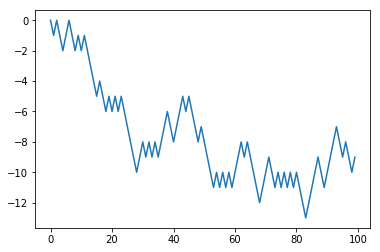

In [9]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])

In [13]:
np.random.seed(1234) #난수 설정

#### NumPy 이용 (배열, 난수 등)

In [14]:
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [16]:
walk.min()

-9

In [17]:
walk.max()

60

In [20]:
#계단의 처음 위치에서 처음으로 10칸 떨어지기까지 얼마나 걸렸나? (중요)
(np.abs(walk) >= 10).argmax() #argmax(불리언 배열에서 최댓값의 처음 색인을 반환, 0이 아니면 TRUE니까 argmax함수 이용한 것)

297

#### 한 번에 시뮬레이션

In [21]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size = (nwalks, nsteps)) # 0 또는 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]], dtype=int32)

In [23]:
walks.max()

122

In [24]:
walks.min()

-128

In [26]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True,  True,  True, ...,  True, False,  True])

In [27]:
hits30.sum()

3368

In [29]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

509.99762470308787

In [ ]:
#다른 분포를 이용해보기
steps = np.random.normal(loc = 0, scale = 0.25, size = (nwalks, nsteps))